In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_excel('/Online Retail.xlsx')

In [ ]:
dataset.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
dataset.shape

(541909, 8)

In [ ]:
dataset_test=pd.read_excel('/test.xlsx')

In [ ]:
dataset_test.shape

(162573, 8)

In [ ]:
dataset_train=pd.read_excel('/train.xlsx')

In [ ]:
dataset_train.shape

(379336, 8)

In [ ]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
dataset.describe(include='O')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [ ]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


as we can see there are negative values for quantity and unitprice which is not realistic value,so this may be wrong observation

In [ ]:
dataset[dataset.Quantity<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
dataset[dataset.InvoiceNo.astype(str).str.startswith("C")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
x=dataset.loc[~(dataset.InvoiceNo.astype(str).str.startswith("C"))]
print(x[x.Quantity<0].UnitPrice.value_counts())
print(dataset[dataset.UnitPrice<=0].UnitPrice.value_counts())
y=dataset.loc[(dataset.InvoiceNo.astype(str).str.startswith("C"))]
y[y.UnitPrice<=0].UnitPrice.value_counts()

0.0    1336
Name: UnitPrice, dtype: int64
 0.00        2515
-11062.06       2
Name: UnitPrice, dtype: int64


Series([], Name: UnitPrice, dtype: int64)

In [ ]:
print(y.groupby(['Country'])['InvoiceNo'].nunique())
dataset.groupby(['Country'])['InvoiceNo'].nunique()


Country
Australia               12
Austria                  2
Bahrain                  1
Belgium                 21
Channel Islands          7
Cyprus                   4
Czech Republic           3
Denmark                  3
EIRE                    72
European Community       1
Finland                  7
France                  69
Germany                146
Greece                   1
Hong Kong                4
Israel                   1
Italy                   17
Japan                    9
Malta                    5
Netherlands              6
Norway                   4
Poland                   5
Portugal                13
Saudi Arabia             1
Singapore                3
Spain                   15
Sweden                  10
Switzerland             20
USA                      2
United Kingdom        3372
Name: InvoiceNo, dtype: int64


Country
Australia                  69
Austria                    19
Bahrain                     4
Belgium                   119
Brazil                      1
Canada                      6
Channel Islands            33
Cyprus                     20
Czech Republic              5
Denmark                    21
EIRE                      360
European Community          5
Finland                    48
France                    461
Germany                   603
Greece                      6
Hong Kong                  15
Iceland                     7
Israel                      9
Italy                      55
Japan                      28
Lebanon                     1
Lithuania                   4
Malta                      10
Netherlands               101
Norway                     40
Poland                     24
Portugal                   71
RSA                         1
Saudi Arabia                2
Singapore                  10
Spain                     105
Sweden                     46
Sw

In [ ]:
dataset.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
dataset.dropna(axis=0, subset=['CustomerID'], inplace=True)

In [ ]:
dataset.shape

(406829, 8)

In [ ]:
dataset = dataset[~dataset['InvoiceNo'].astype(str).str.contains('C')]


In [ ]:
dataset.shape

(397924, 8)

In [ ]:
dataset.Description.nunique()

3877

In [ ]:
dataset.Description.count()

397924

In [ ]:
df=dataset.copy()

In [ ]:
dataset[dataset.duplicated(subset=None, keep='first')]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [ ]:
df.drop_duplicates(subset=None, keep='first',inplace=True)

In [ ]:
df.shape

(392732, 8)

In [ ]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.describe(include='O')

,InvoiceNo,StockCode,Description,Country
count,392732,392732,392732,392732
unique,18536,3665,3877,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2023,2016,349227


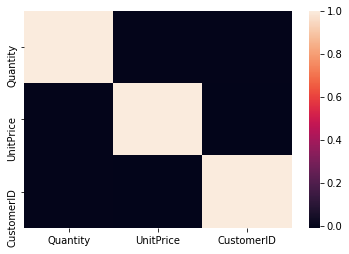

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.CustomerID.value_counts()

17841.0    7676
14911.0    5672
14096.0    5111
12748.0    4413
14606.0    2677
           ... 
18233.0       1
18184.0       1
17846.0       1
14090.0       1
16093.0       1
Name: CustomerID, Length: 4339, dtype: int64

In [ ]:
df.InvoiceNo.value_counts()

576339    542
579196    533
580727    529
578270    442
573576    435
         ... 
571259      1
571250      1
556099      1
571237      1
549585      1
Name: InvoiceNo, Length: 18536, dtype: int64

In [ ]:
df.Country.nunique()

37

In [ ]:
n_orders = df.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

65.57% of customers ordered more than once.


In [ ]:
df.groupby(['Country'])['CustomerID'].nunique()

Country
Australia                  9
Austria                   11
Bahrain                    2
Belgium                   25
Brazil                     1
Canada                     4
Channel Islands            9
Cyprus                     8
Czech Republic             1
Denmark                    9
EIRE                       3
European Community         1
Finland                   12
France                    87
Germany                   94
Greece                     4
Iceland                    1
Israel                     3
Italy                     14
Japan                      8
Lebanon                    1
Lithuania                  1
Malta                      2
Netherlands                9
Norway                    10
Poland                     6
Portugal                  19
RSA                        1
Saudi Arabia               1
Singapore                  1
Spain                     30
Sweden                     8
Switzerland               21
USA                        4
United

In [ ]:
df.groupby(['Country','StockCode'])['InvoiceNo'].nunique()

Country      StockCode
Australia    15036        1
             20665        1
             20675        2
             20676        2
             20677        2
                         ..
Unspecified  85049A       1
             85179A       1
             85179C       1
             85180A       1
             85180B       1
Name: InvoiceNo, Length: 18937, dtype: int64

In [ ]:
df=df[df.UnitPrice>0]

In [ ]:
df.shape

(392692, 8)

In [ ]:
df['month']=df.InvoiceDate.map(lambda x:x.month)

In [ ]:
df['year']=df.InvoiceDate.map(lambda x:x.year)

In [ ]:
df.groupby(['CustomerID','year','month'])['InvoiceNo'].count()

CustomerID  year  month
12346.0     2011  1          1
12347.0     2010  12        31
            2011  1         29
                  4         24
                  6         18
                          ... 
18283.0     2011  10        38
                  11       209
                  12        50
18287.0     2011  5         29
                  10        41
Name: InvoiceNo, Length: 13054, dtype: int64

In [ ]:
df['DATE'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,DATE
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,2011-12-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,2011-12-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,2011-12-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,2011-12-01


In [ ]:
df.groupby(['CustomerID','DATE'])['InvoiceNo'].count()

CustomerID  DATE      
12346.0     2011-01-01      1
12347.0     2010-12-01     31
            2011-01-01     29
            2011-04-01     24
            2011-06-01     18
                         ... 
18283.0     2011-10-01     38
            2011-11-01    209
            2011-12-01     50
18287.0     2011-05-01     29
            2011-10-01     41
Name: InvoiceNo, Length: 13054, dtype: int64

In [ ]:
grouping = df.groupby('CustomerID')['DATE']
df['Cmindate'] = grouping.transform('min')

In [ ]:

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,DATE,Cmindate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,2011-12-01,2011-08-01


In [ ]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(df,'DATE')
cohort_year,cohort_month,_ = get_month_int(df,'Cmindate')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df['CIndex'] = year_diff * 12 + month_diff + 1 

In [ ]:
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,DATE,Cmindate,CIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,2011-12-01,2011-08-01,5


In [ ]:
cohort_data = df.groupby(['Cmindate', 'CIndex'])['CustomerID'].nunique()
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='Cmindate',columns='CIndex',values='CustomerID')
cohort_counts

CIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
Cmindate,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


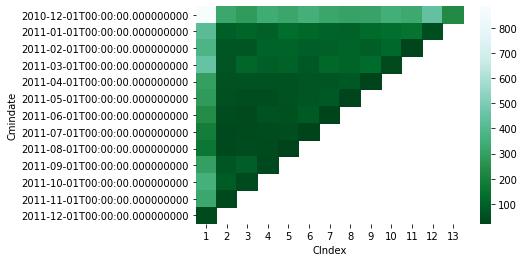

In [ ]:
sns.heatmap(cohort_counts,cmap='BuGn_r')

In [ ]:
df['DATE'].max()

Timestamp('2011-12-01 00:00:00')

In [ ]:
df1=df.copy()

In [ ]:
x=df.groupby(['CustomerID'])['DATE'].max()

In [ ]:
x=pd.DataFrame(x)
x.DATE=pd.to_datetime(x.DATE)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    4338 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 67.8 KB


In [ ]:
x['recency']=df['DATE'].max()-x['DATE']
x['recency']=x.recency.dt.days

In [ ]:
x.drop('DATE',axis=1,inplace=True)
x=x.reset_index()

In [ ]:
x

,CustomerID,recency
0,12346.0,334
1,12347.0,0
2,12348.0,91
3,12349.0,30
4,12350.0,303
...,...,...
4333,18280.0,275
4334,18281.0,183
4335,18282.0,0
4336,18283.0,0


In [ ]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,DATE,Cmindate,CIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,2011-12-01,2011-08-01,5


In [ ]:
freq=df1.groupby(['CustomerID'])['InvoiceNo'].nunique()

In [ ]:
pd.cut(freq,3)

CustomerID
12346.0    (0.792, 70.333]
12347.0    (0.792, 70.333]
12348.0    (0.792, 70.333]
12349.0    (0.792, 70.333]
12350.0    (0.792, 70.333]
                ...       
18280.0    (0.792, 70.333]
18281.0    (0.792, 70.333]
18282.0    (0.792, 70.333]
18283.0    (0.792, 70.333]
18287.0    (0.792, 70.333]
Name: InvoiceNo, Length: 4338, dtype: category
Categories (3, interval[float64]): [(0.792, 70.333] < (70.333, 139.667] < (139.667, 209.0]]

In [ ]:
df1['moneyspent']=df1['Quantity']*df1['UnitPrice']
monetary=df1.groupby(['CustomerID'])['moneyspent'].sum()

In [ ]:
pd.cut(monetary,3).unique()

[(-276.452, 93404.507], (93404.507, 186805.263], (186805.263, 280206.02]]
Categories (3, interval[float64]): [(-276.452, 93404.507] < (93404.507, 186805.263] <
                                    (186805.263, 280206.02]]

In [ ]:
monetary.quantile(0.33)

384.101

In [ ]:
recency=x.copy()

In [ ]:
recency

,CustomerID,recency
0,12346.0,334
1,12347.0,0
2,12348.0,91
3,12349.0,30
4,12350.0,303
...,...,...
4333,18280.0,275
4334,18281.0,183
4335,18282.0,0
4336,18283.0,0


In [ ]:
monetary=pd.DataFrame(monetary)

In [ ]:
freq=pd.DataFrame(freq)
freq=freq.reset_index()
freq.columns=['CustomerID','frequency']
freq

,CustomerID,frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4333,18280.0,1
4334,18281.0,1
4335,18282.0,2
4336,18283.0,16


In [ ]:
monetary=monetary.reset_index()
monetary.columns=['CustomerID','moneyspent']
monetary

,CustomerID,moneyspent
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2045.53


In [ ]:
df2=recency.merge(freq,on='CustomerID')

In [ ]:
df2=df2.merge(monetary,on='CustomerID')

In [ ]:
df2.set_index('CustomerID',inplace=True)

In [ ]:
df2

,recency,frequency,moneyspent
CustomerID,,,
12346.0,334,1,77183.60
12347.0,0,7,4310.00
12348.0,91,4,1797.24
12349.0,30,1,1757.55
12350.0,303,1,334.40
...,...,...,...
18280.0,275,1,180.60
18281.0,183,1,80.82
18282.0,0,2,178.05


In [ ]:
cutoff = df2['moneyspent'].sum() * 0.8
print("The 80% of total revenue is: ",round(cutoff,2))


The 80% of total revenue is:  7109767.12


In [ ]:

c_rank = df2.copy()
c_rank['Rank'] = c_rank['moneyspent'].rank(ascending=0)
c_rank.head()

,recency,frequency,moneyspent,Rank
CustomerID,,,,
12346.0,334,1,77183.60,10.0
12347.0,0,7,4310.00,335.0
12348.0,91,4,1797.24,1004.0
12349.0,30,1,1757.55,1027.0
12350.0,303,1,334.40,3097.0


In [ ]:
c_rank.sort_values('Rank',inplace=True)

In [ ]:
c_rank

,recency,frequency,moneyspent,Rank
CustomerID,,,,
14646.0,0,73,280206.02,1.0
18102.0,0,60,259657.30,2.0
17450.0,0,46,194390.79,3.0
16446.0,0,2,168472.50,4.0
14911.0,0,201,143711.17,5.0
...,...,...,...,...
16878.0,91,1,13.30,4334.0
17956.0,244,1,12.75,4335.0
16454.0,61,2,6.90,4336.0


In [ ]:
4338*0.2

867.6

In [ ]:
c_rank[c_rank['Rank'] <= 867.6]['moneyspent'].sum()

6635245.310999999

In [ ]:
quantiles = df2.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,moneyspent
0.25,30.0,1.0,306.4825
0.50,61.0,2.0,668.5700
0.75,153.0,5.0,1660.5975


In [ ]:
df2.loc[15749.0]

recency         244.0
frequency         3.0
moneyspent    44534.3
Name: 15749.0, dtype: float64

In [ ]:
r_labels =range(3,0,-1)
f_labels=range(1,4)
m_labels=range(1,4)
r_quartiles = pd.qcut(df2['recency'], q=3, labels = r_labels)
f_quartiles = pd.qcut(df2['frequency'],q=4,duplicates='drop' ,labels = f_labels)
m_quartiles = pd.qcut(df2['moneyspent'],q=3,labels = m_labels)
df2 = df2.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
df2['RFM_Segment'] = df2.apply(add_rfm,axis=1 )
df2['RFM_Score'] = df2[['R','F','M']].sum(axis=1)

df2.head()

,recency,frequency,moneyspent,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,334,1,77183.60,1,1,3,113,5.0
12347.0,0,7,4310.00,3,3,3,333,9.0
12348.0,91,4,1797.24,2,2,3,223,7.0
12349.0,30,1,1757.55,3,1,3,313,7.0
12350.0,303,1,334.40,1,1,1,111,3.0


In [ ]:
df3=df2.copy()
df3=df3[['recency','frequency','moneyspent']]

In [ ]:
df3

,recency,frequency,moneyspent
CustomerID,,,
12346.0,334,1,77183.60
12347.0,0,7,4310.00
12348.0,91,4,1797.24
12349.0,30,1,1757.55
12350.0,303,1,334.40
...,...,...,...
18280.0,275,1,180.60
18281.0,183,1,80.82
18282.0,0,2,178.05


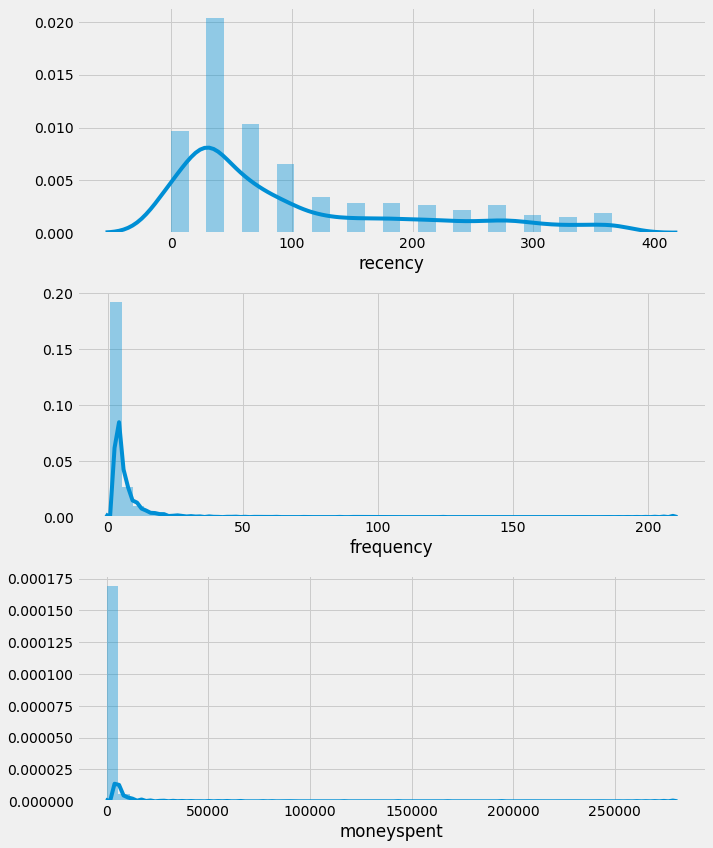

In [ ]:
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(df3.recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(df3.frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(df3.moneyspent, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [ ]:
np.log(df3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,recency,frequency,moneyspent
CustomerID,,,
12346.0,5.811141,0.000000,11.253942
12347.0,-inf,1.945910,8.368693
12348.0,4.510860,1.386294,7.494007
12349.0,3.401197,0.000000,7.471676
12350.0,5.713733,0.000000,5.812338
...,...,...,...
18280.0,5.616771,0.000000,5.196285
18281.0,5.209486,0.000000,4.392224
18282.0,-inf,0.693147,5.182064


In [ ]:

#log transformation
logdf1 = np.log(df3['recency']+0.1) #can't take log(0) and so add a small number
logdf2 = np.log(df3['frequency'])
logdf3 = np.log(df3['moneyspent']+0.1)

In [ ]:
log_data = pd.DataFrame({'recency': logdf1,'frequency': logdf2,'moneyspent': logdf3})

In [ ]:
log_data

,recency,frequency,moneyspent
CustomerID,,,
12346.0,5.811440,0.000000,11.253944
12347.0,-2.302585,1.945910,8.368716
12348.0,4.511958,1.386294,7.494063
12349.0,3.404525,0.000000,7.471733
12350.0,5.714063,0.000000,5.812637
...,...,...,...
18280.0,5.617135,0.000000,5.196838
18281.0,5.210032,0.000000,4.393461
18282.0,-2.302585,0.693147,5.182626


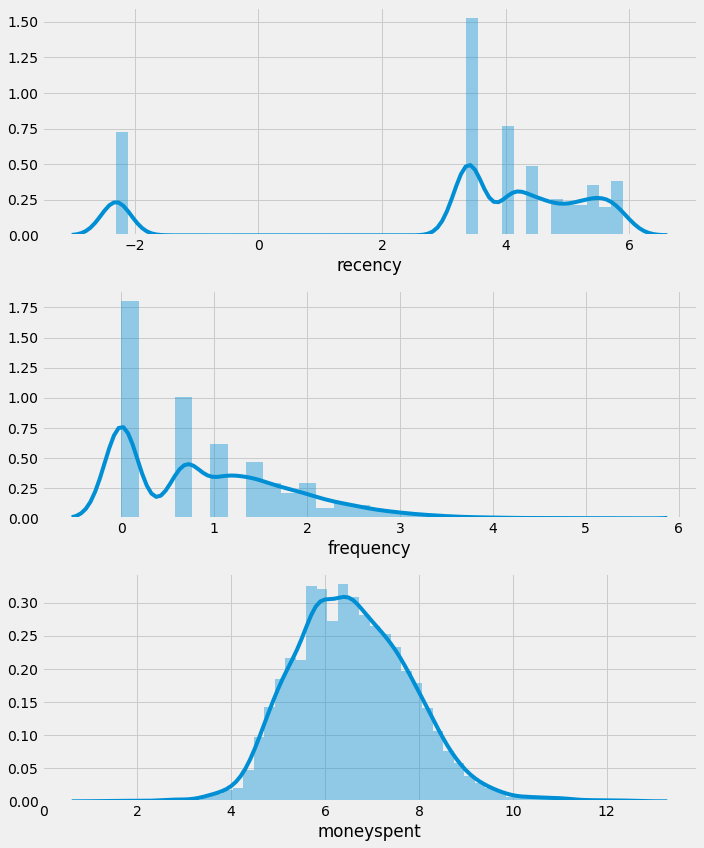

In [ ]:
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(log_data.recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(log_data.frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(log_data.moneyspent, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [ ]:
log_data=log_data.iloc[:,:].values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
log_data=scaler.fit_transform(log_data)
#Store it separately for clustering


AttributeError: ignored

In [ ]:
log_data=pd.DataFrame(log_data,columns={'recency','frequency','moneyspent'})

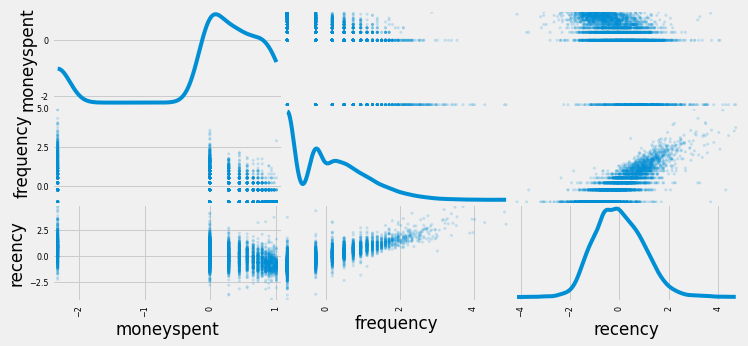

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(log_data, alpha = 0.2, figsize = (11,5), diagonal = 'kde');

In [ ]:
In [ ]: from mpl_toolkits.mplot3d import Axes3D
   ...: import matplotlib.pyplot as plt
   ...: fig = plt.figure()
   ...: ax = Axes3D(fig)
   ...: X = np.arange(-2,2,0.1)
   ...: Y = np.arange(-2,2,0.1)
   ...: X,Y = np.meshgrid(X,Y)
   ...: def f(x,y):
   ...:    return (1 - y**5 + x**5)*np.exp(-x**2-y**2)
   ...: ax.plot_surface(X,Y,f(X,Y), rstride=1, cstride=1)